# Intro

## Machine Learning

A general overview that I liked from a video in this course describes machine learning as:
- We have a problem (car not starting)
- We have this box of tools (algorithms) that are used to fix various problems (hammer, wrench, axe, etc.)
- We have these other "measurement tools" (evaluation metrics) to evaluate how effective a tool would be in fixing our issue. Once we decide what tool (alg) is best, we get after solving the problem

## Categories of ML

- Supervised learning - training with labeled data in order to be able to label unlabeled data.
  - Classification - predict categorical outcomes (detecting evil, detecting dog breed, etc.). There can be more than 2 possible outcomes for classification
  - Regression - predict numeric outcomes
- Unsupervised learning
- Reinforcement learning

## Scikit-learn

Popular FOSS library for supervised or unsupervised learning.

## Ethics in ML

Real-world data holds errors and biases, so the models will as well.

If humans create the data, there will inherently be bias. Keep this on your mind when building out a model.

Real world validation of models is vital, even more so that statistical validation.

# Linear Regression

Regression answers "how much"

The highest level of regression is LR. It's based around the idea of fitting (drawing) a line through a dataset plotted on a graph.

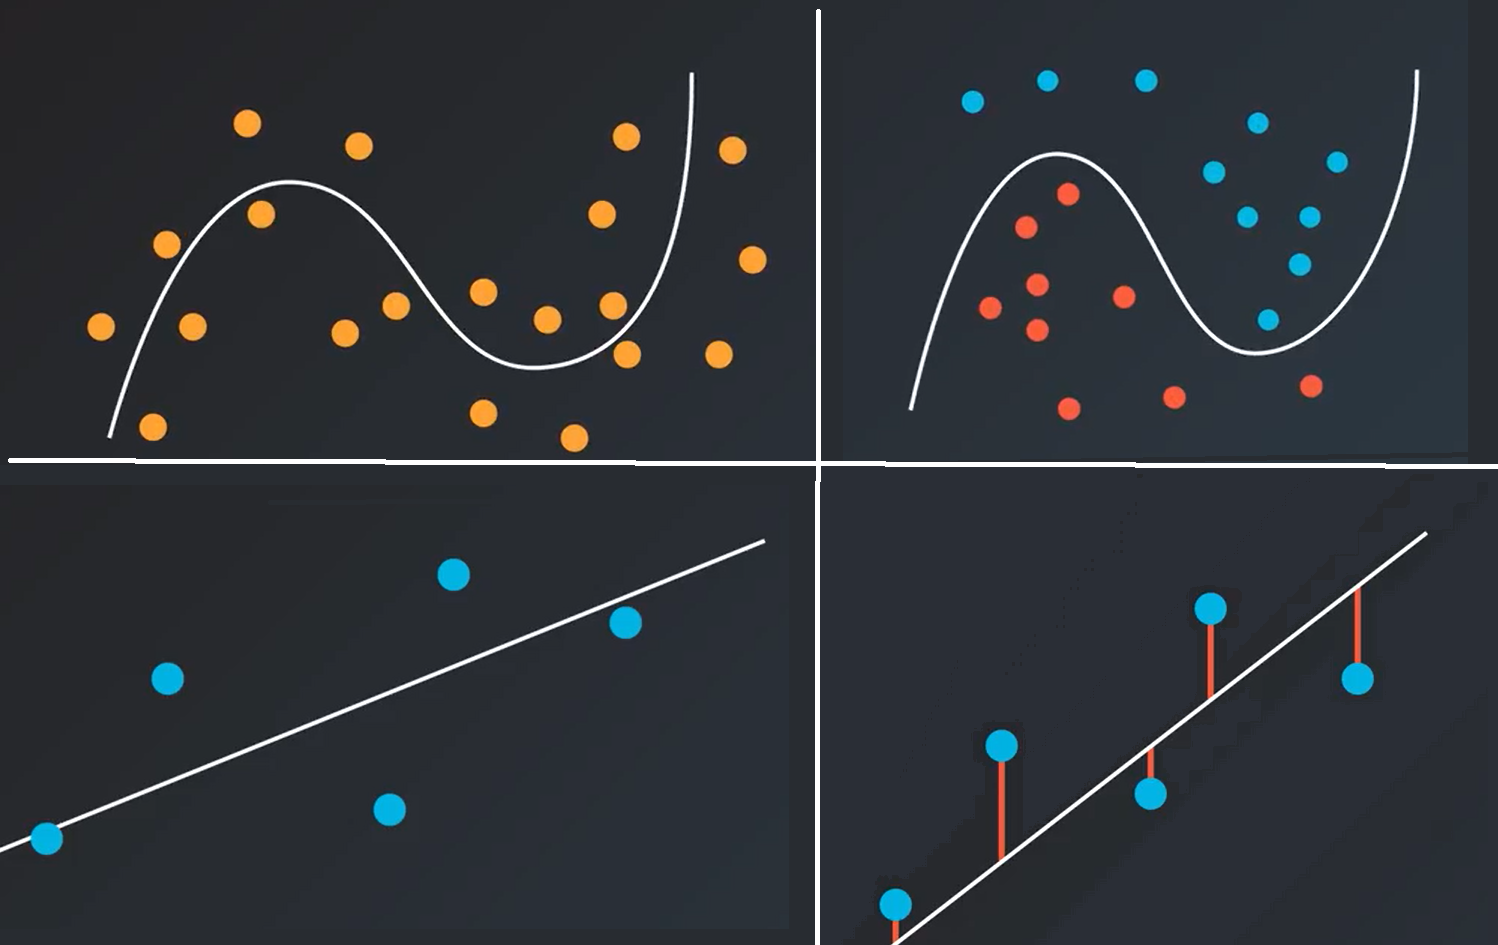

## Fitting a line

Draw a line and ask each point what it waants

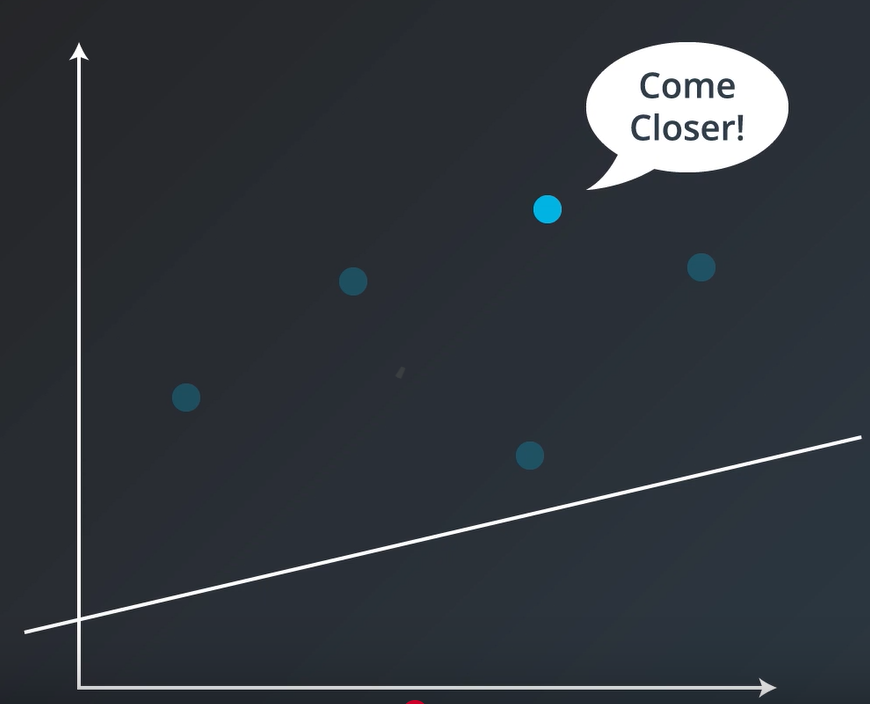

Then we keep doing that over and over

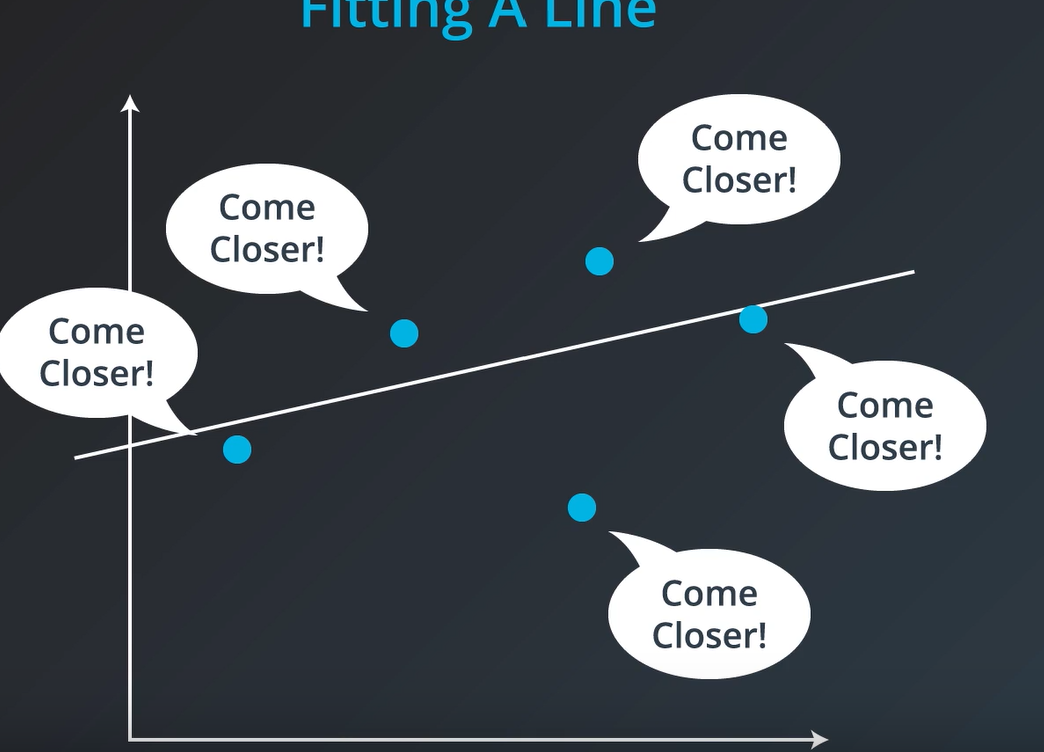

And eventually, the line will be as close as possible to every point.

### Moving a Line

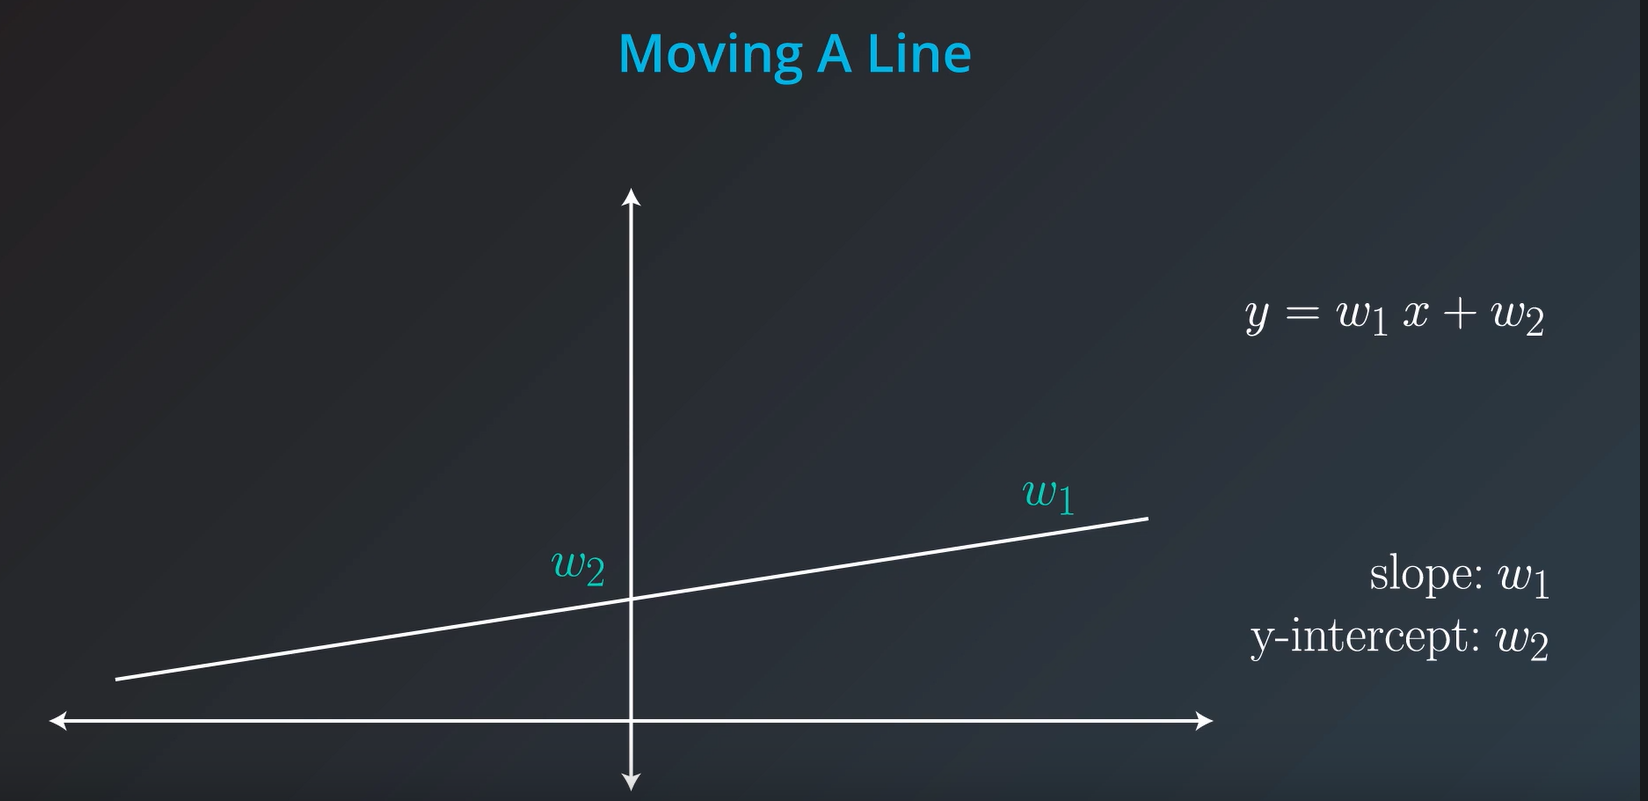

If we increase the slope, or $w_{1}$, we will cause the angle to steepen. If we just increase the y-intercept, or $w_{2}$, we will translate the entire line upward by that amount.

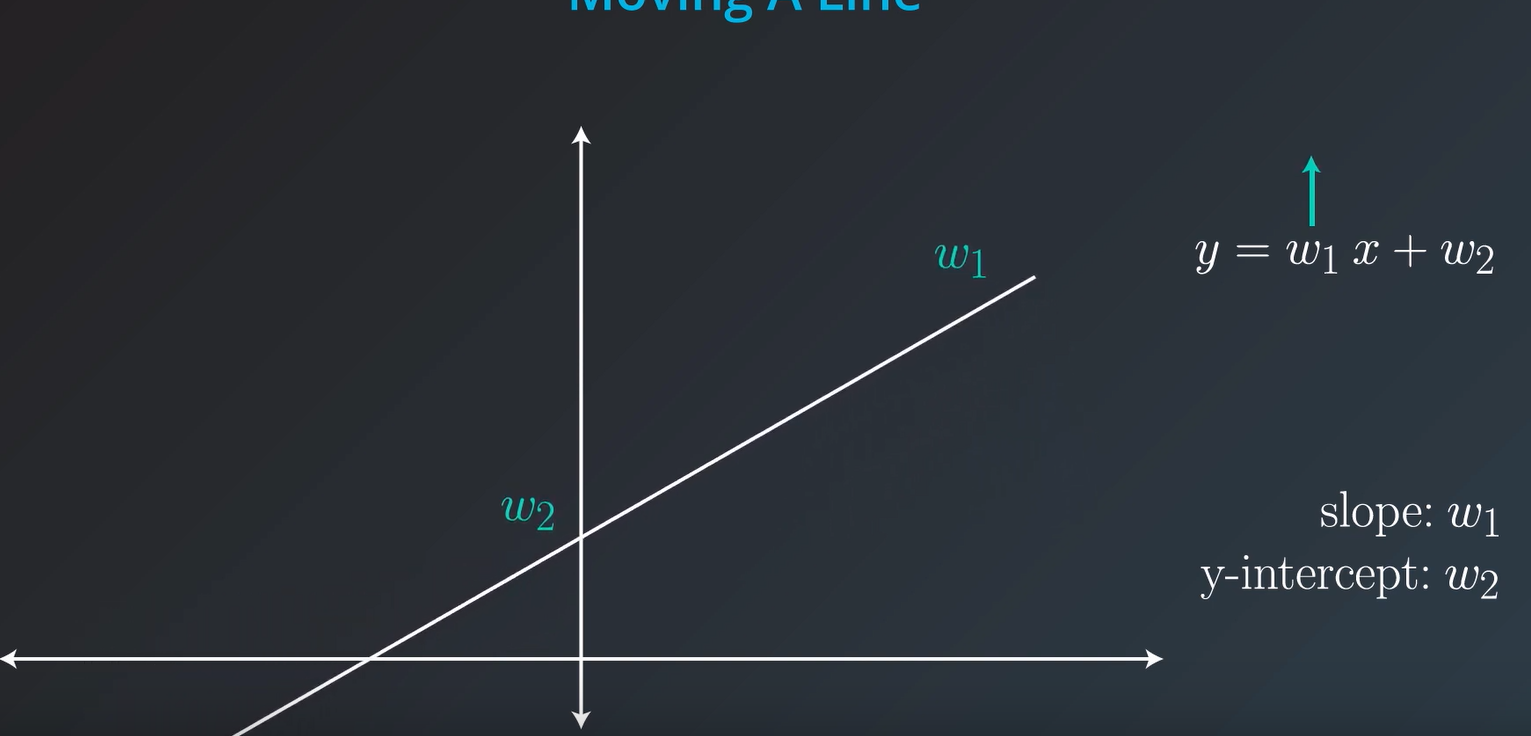

Note: this one was also after a decrease to the slope was applied. But yeah, changing the y-intercept will cause the line to move paralell in that direction

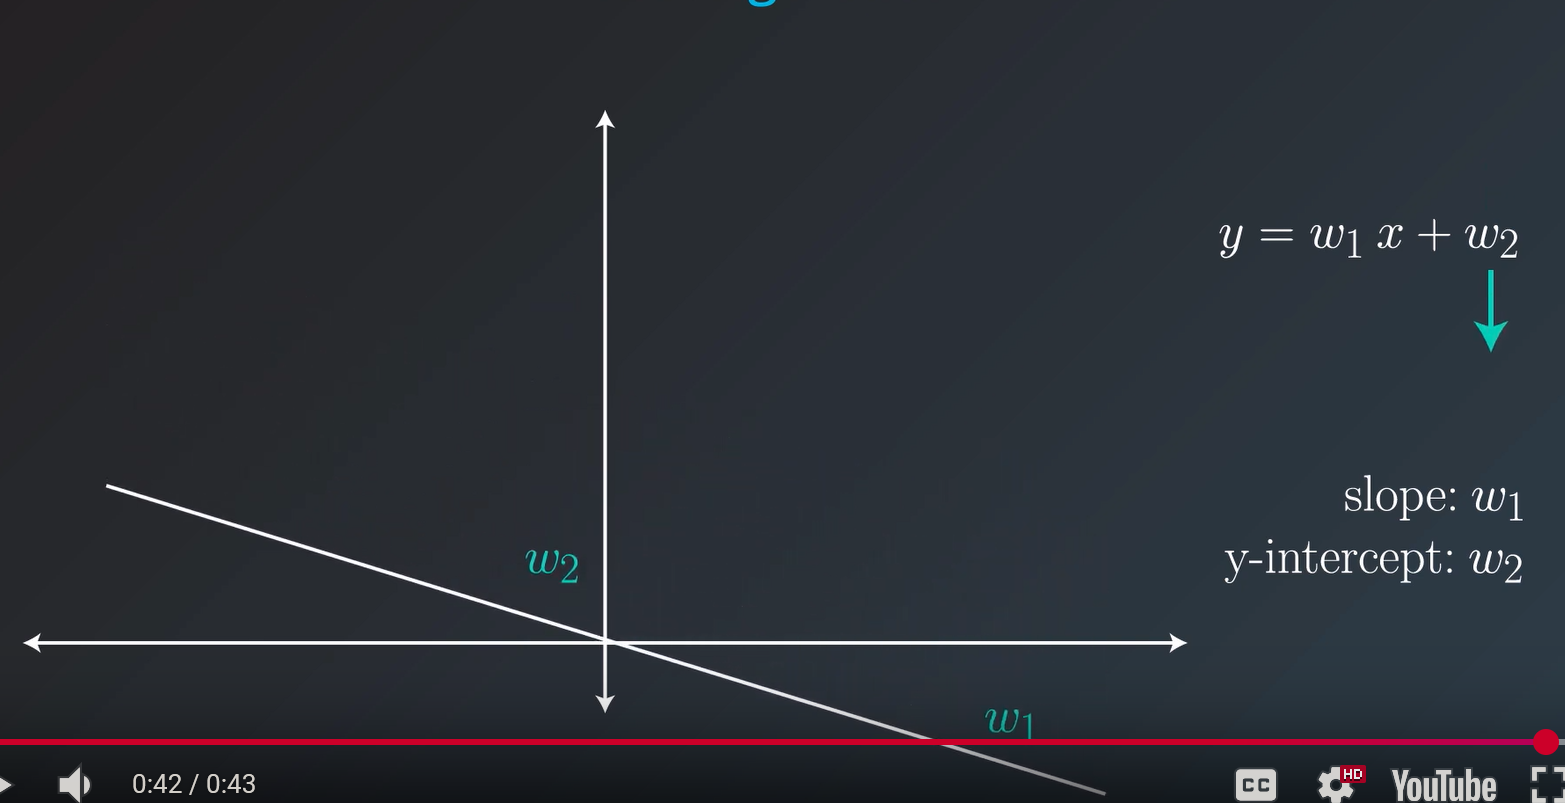

### Absolute Trick

- Start with a point and a line
- Point wants line to come closer to it at location $(p, q)$. 
- Line is represented as $y = w_{1}x + w_{2}$
- The trick has two steps
  1. Add to the y-intercept ($w_{2}$) so the line moves up (or subtract if it needs to go down)
  2. Add to the slope ($w_{1}$) to make the line rotate in the direction of the point

If the point is above the line, one of the first steps that could be take would be just adding one to the y-int and $p$ to the slope, giving us:
$$y = (w_{1} + p)x + (w_{2} + 1)$$

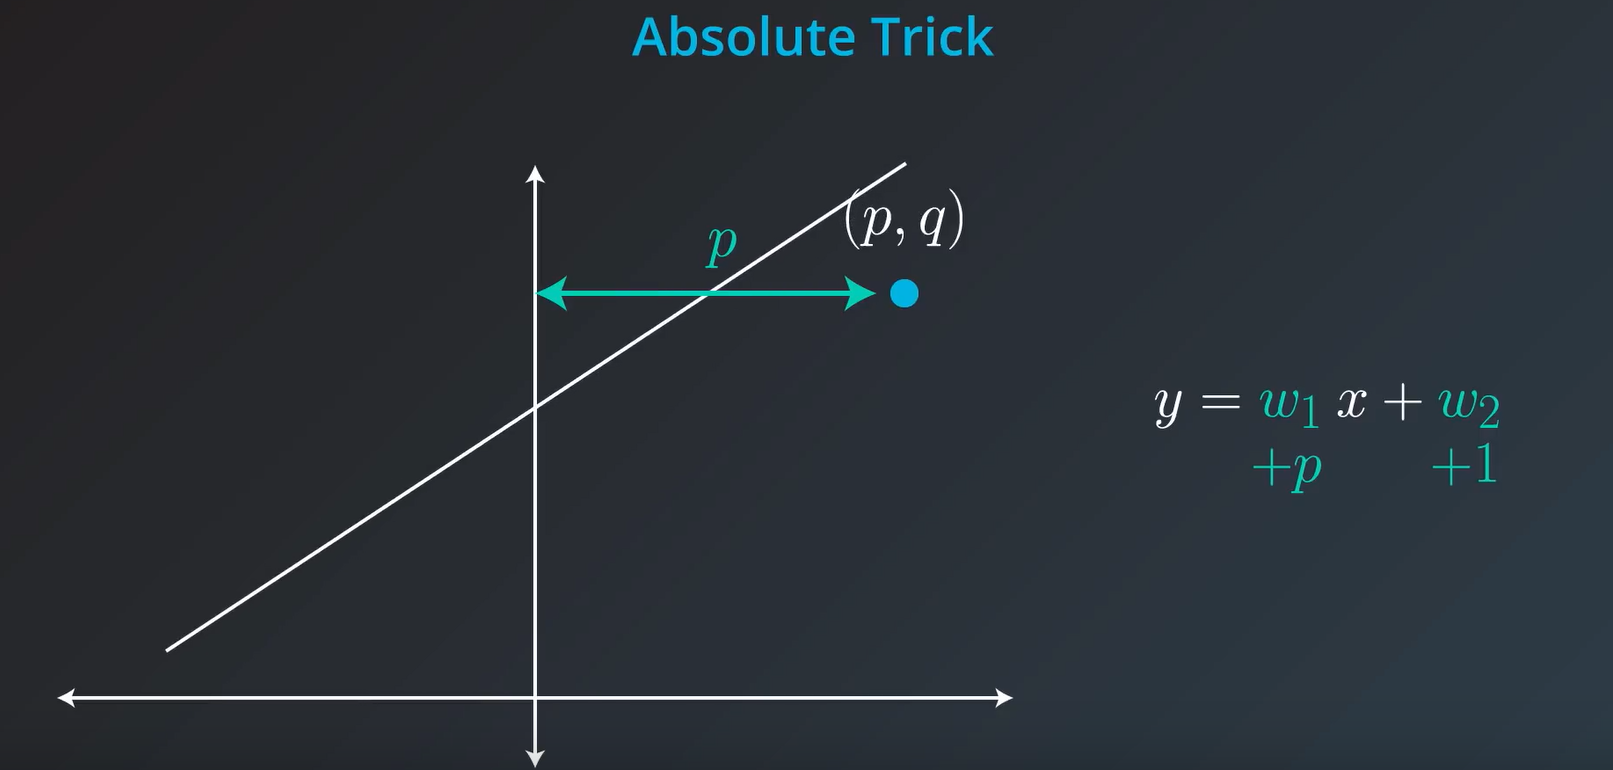


The line was moved too much, so we need to take tinier steps. We do this by applying a learning rate ($a$, in this case)

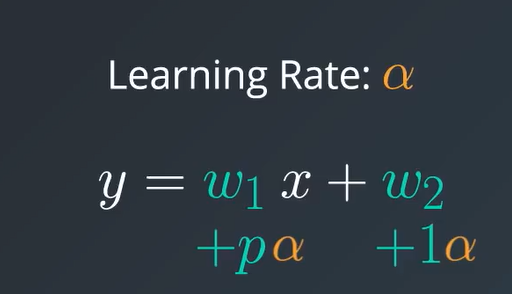

This would make our new equation:
$$y = (w_{1} + pa)x + (w_{2} + a)$$

If the point is under the line, we just subtract instead, and get
$$y = (w_{1} - pa)x + (w_{2} - a)$$

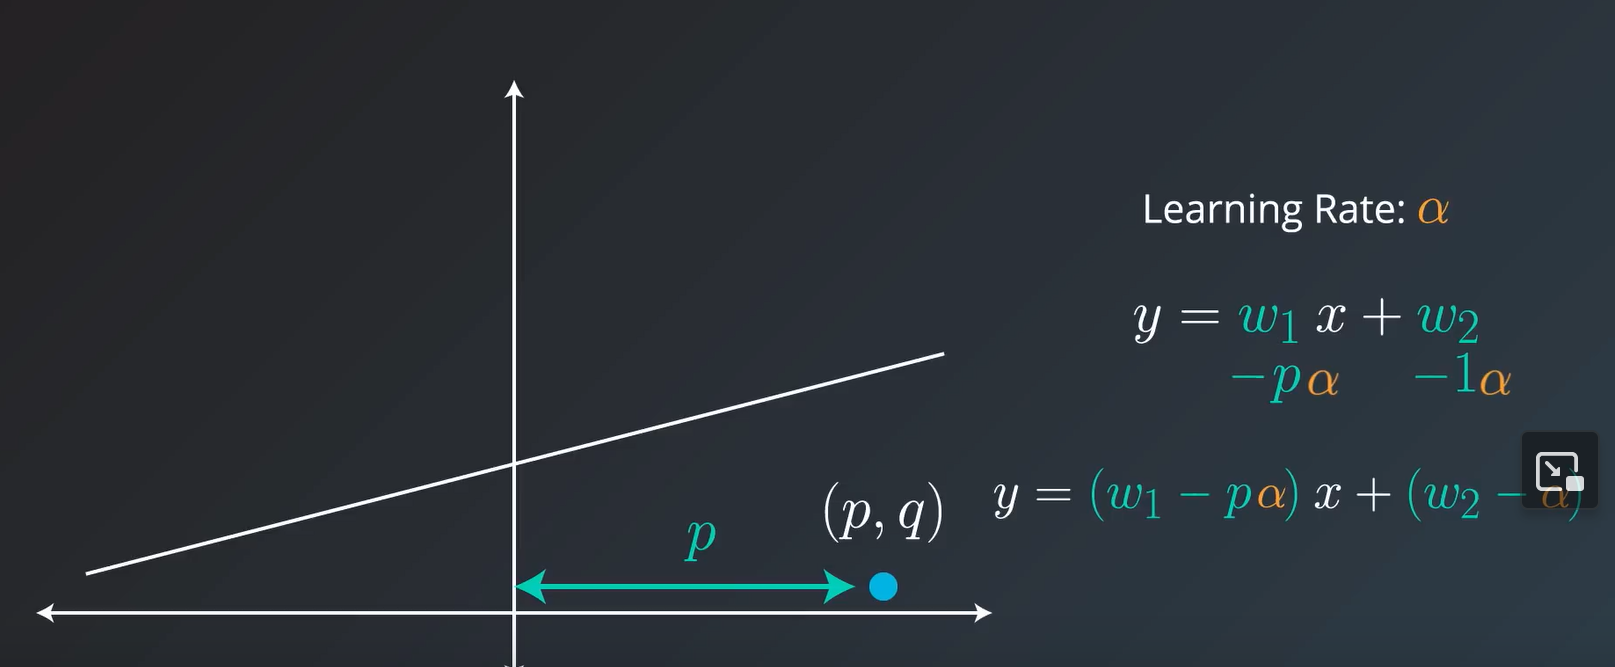

If we now have a point that is above, but to the left of the line, we still do the same thing as moving it up and to the right, but bear in mind that $p$ will be a negative number, so the slope's angle will decrease.

$$y = (w_{1} + pa)x + (w_{2} + a)$$

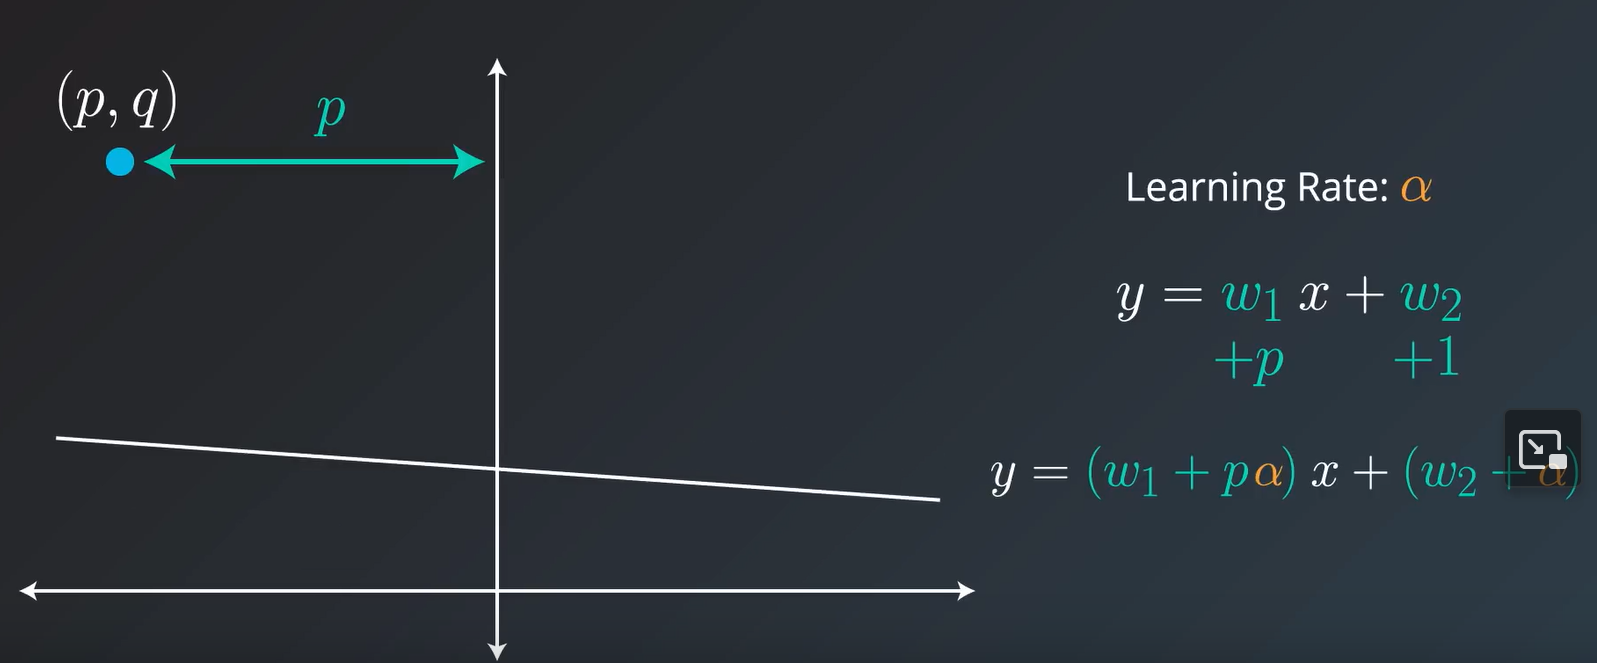

Here is an example using actual numbers

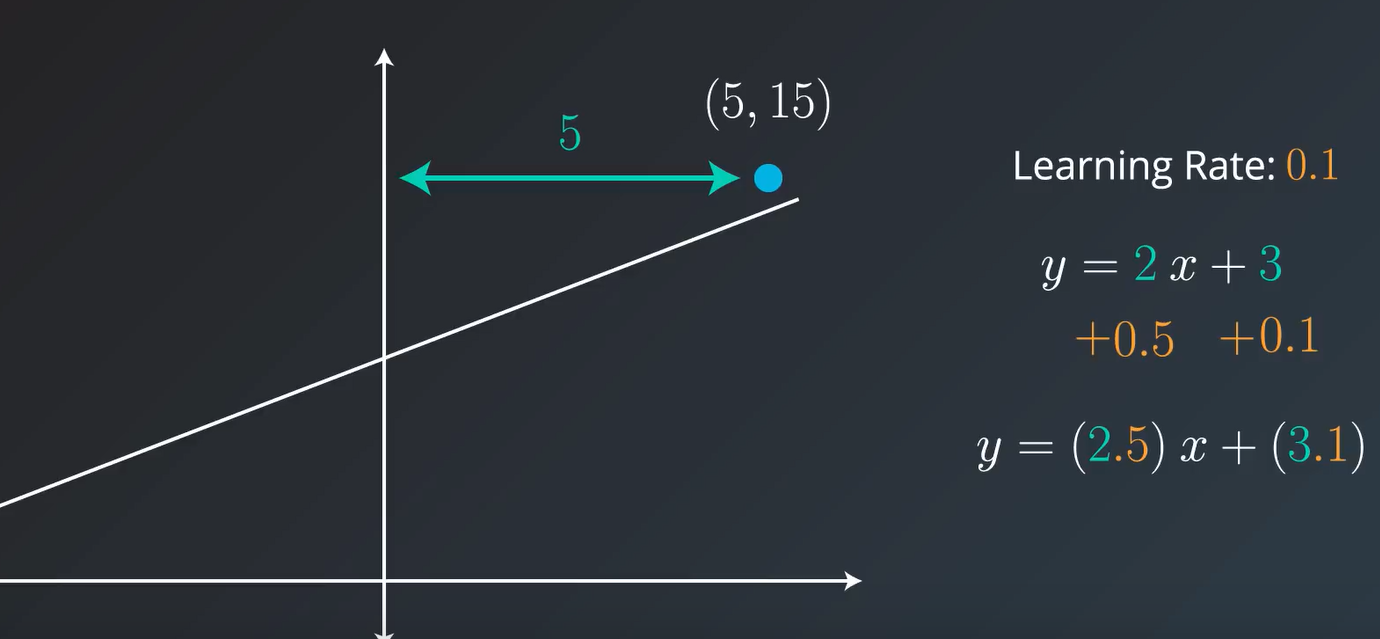

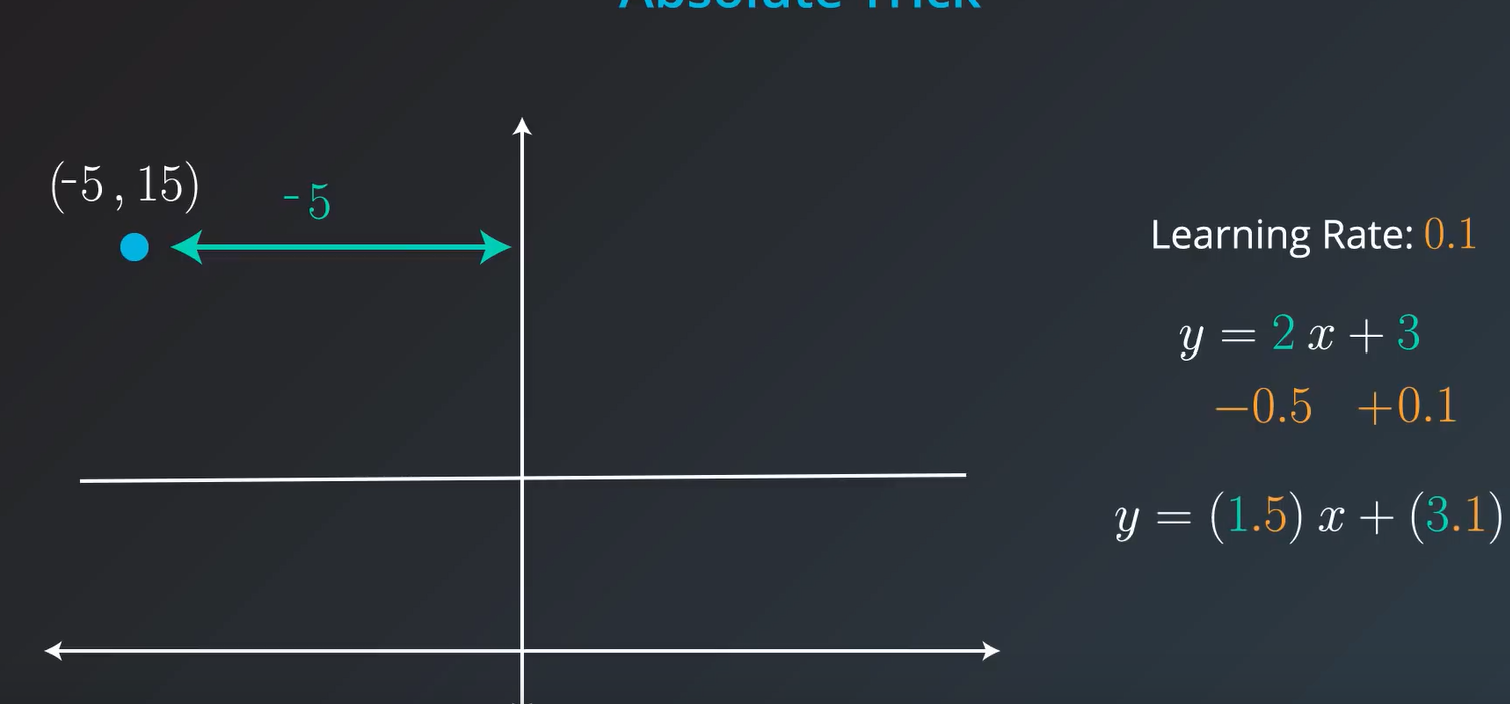

#### Practice: 

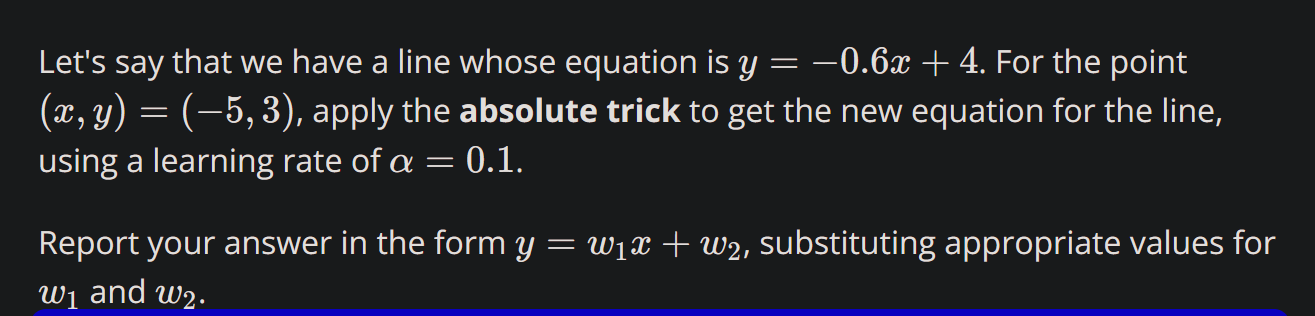

Because the y-int is 4 and the point's y coord is 3, the dot we want to get to is to the left and below the line

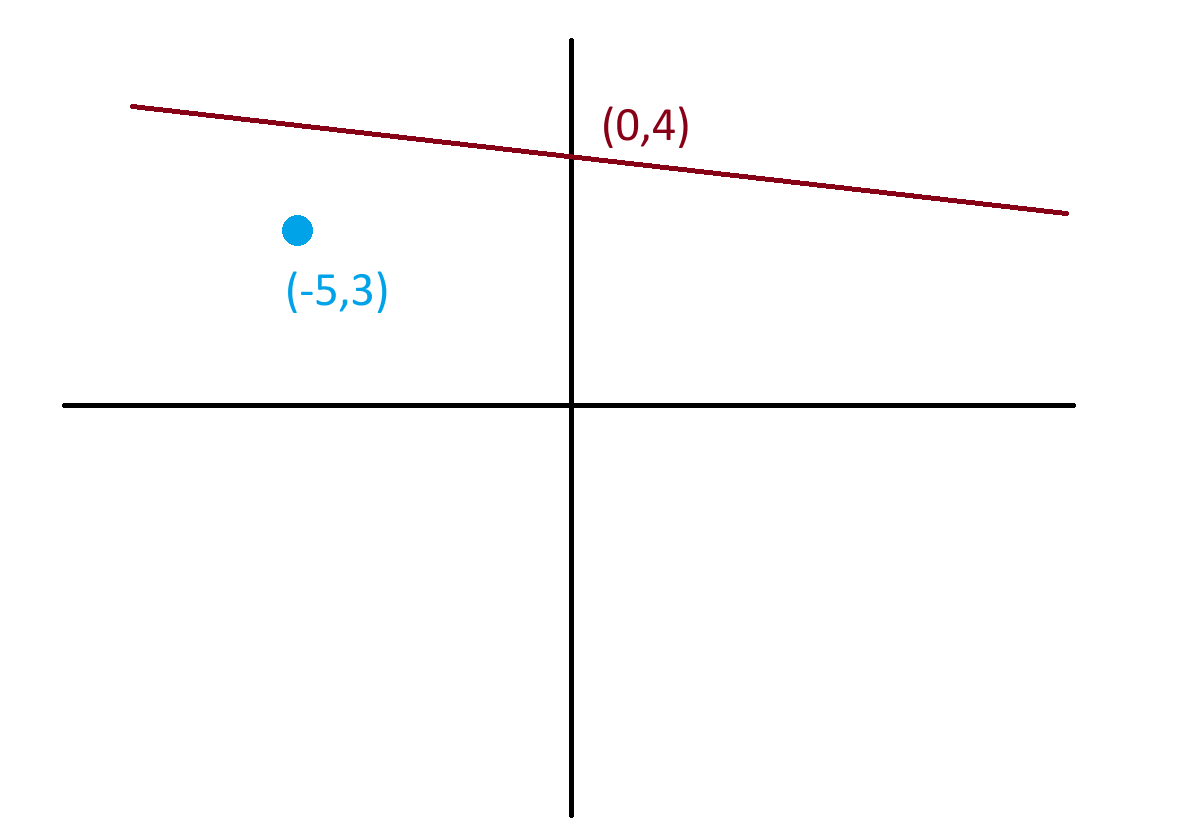

Plug and chug, subtracting because we want to move : 

$y = (-0.6+pa)x + (4-a)$

$y = (-0.6-(-5)(0.1))x + (4-0.1)$

$y = (-0.6 - -0.5)x + 3.9$

$y = (-0.6 + 0.5)x + 3.9$

$y = -0.1x + 3.9$

### Square Trick

Another way to move a point closer to the line. The abs trick will move the line by a constant value without factoring in how far the point is, but the square trick *WILL* factor it in because it is now caring about the vertical distance between the target point and the line to be moved.

We are now just adding the vertical distance to the formula we got from the absolute trick

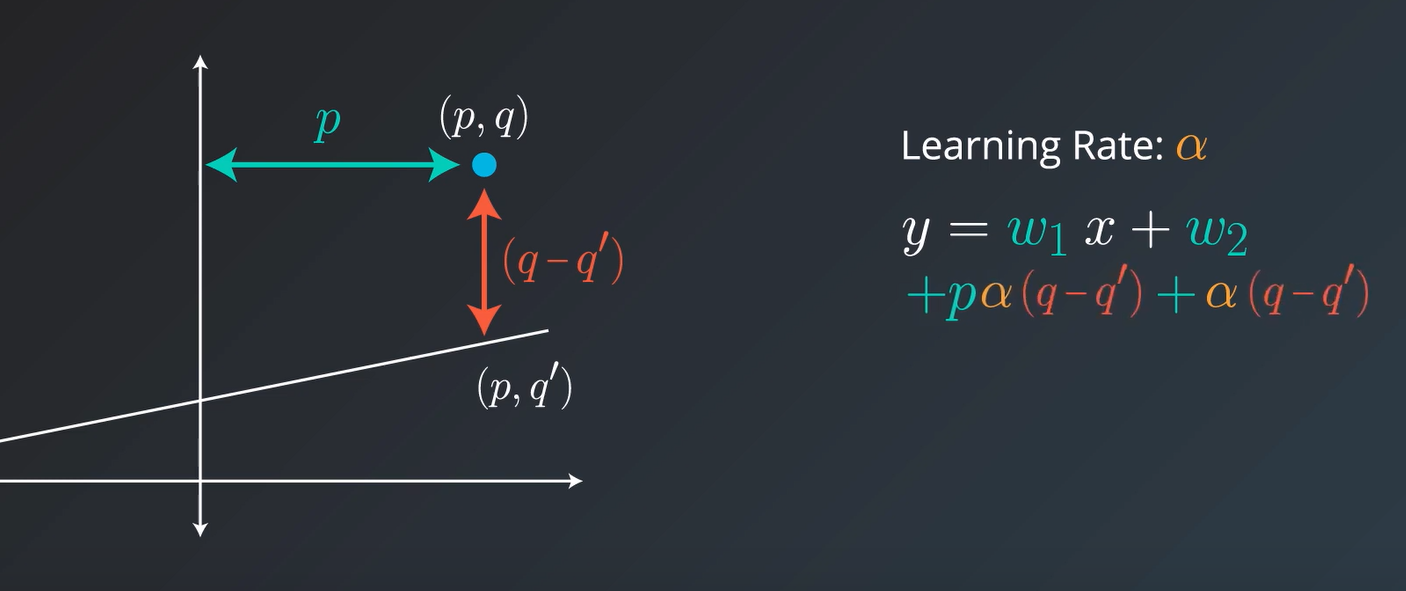

It makes sense that it would be $q - q\prime$ (Q-Prime) since calculating the distance between those points, which is the amount you need to move, would be done as such.

Our equation now becomes:

$$y = (w_{1} + p(q - q\prime)a)x + (w_{2} + (q - q\prime)a)$$

This also takes care of points that are under the line, since $q - q\prime$ will be a negative number

Example with real numbers, note that the number in red is a result of $p * (q - q\prime)$:

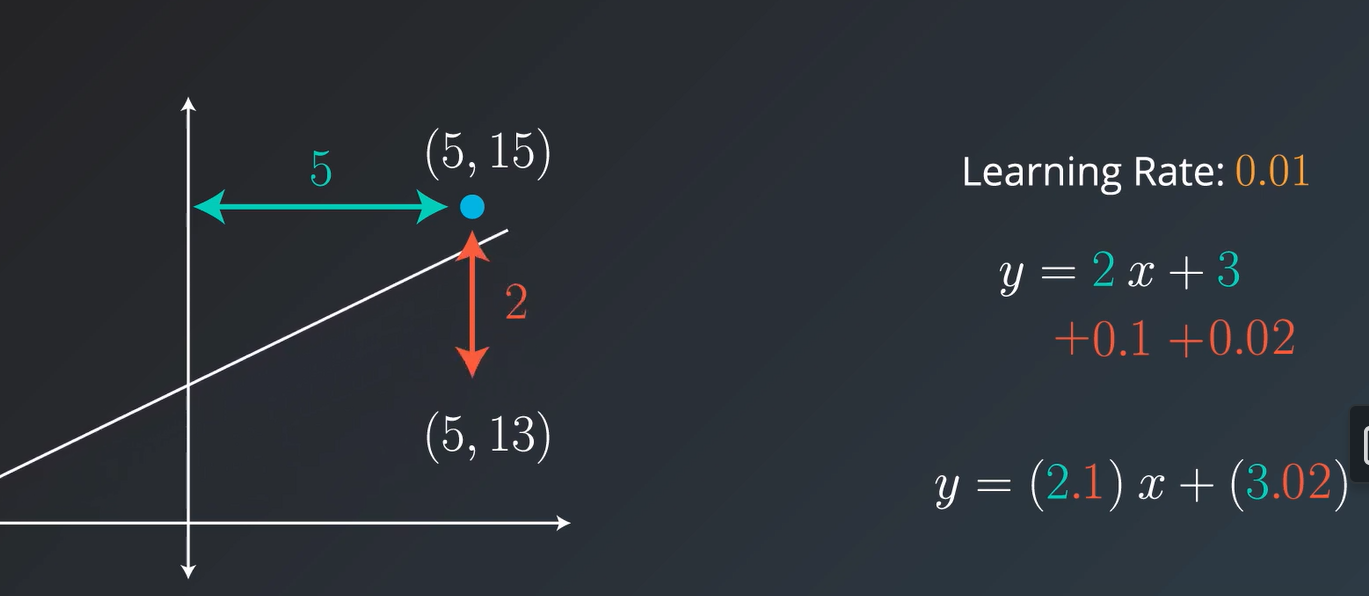






#### Example

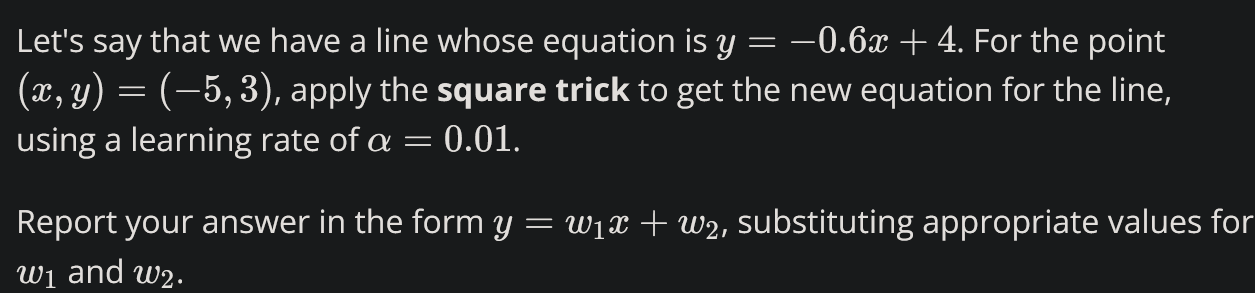


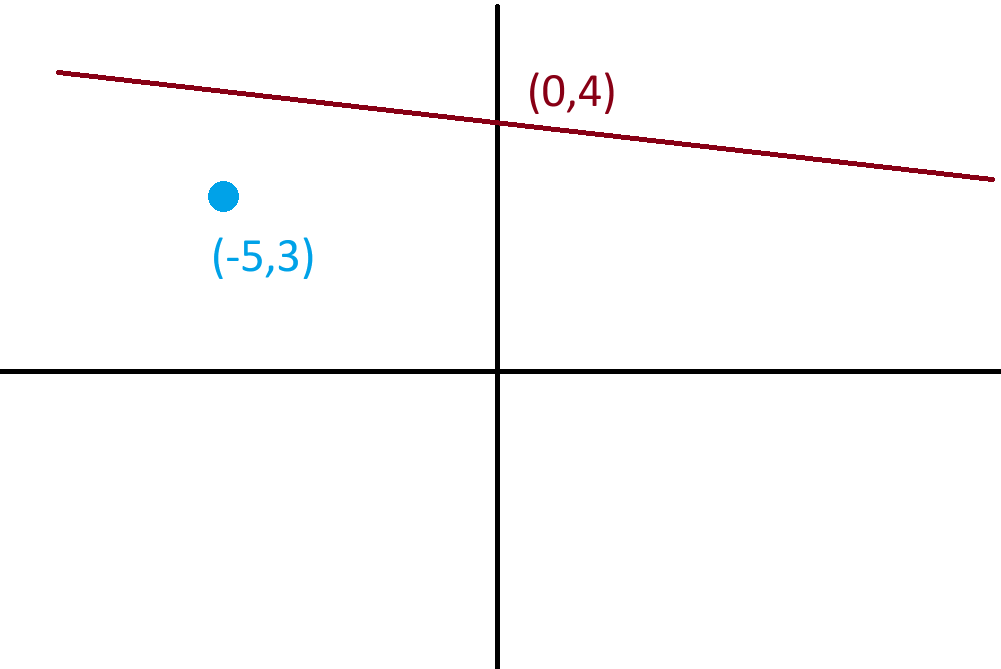

Calculate $q\prime$:
- $y = -0.6(-5) + 4$
- $y = 3+4$
- $y = 7 = q\prime$

$(q-q\prime) = (3-7) = -4$

Substitute
- $y = (-0.6 + -5(-4).01)x + (4 + -4(.01))$
- $y = (-0.6 + .2)x + (4 - .04)$$
- $y = -0.4x + 3.96$$

### Gradient Descent

Essentially, decreasing error (or distance from points) until ya can't -> algorithmically

Algorithm
- draw a random line amidst points and calculate the total error (distance from points)
- Move the line to see if the error can be decreased
- Repeat over and over again until all changes result in increasing error
- kinda like a sorting algorithm, in a way.

Mathematically
- It's complicated, but essentially:

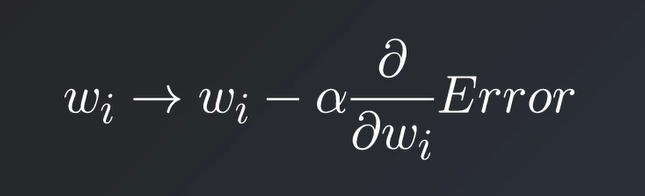

To descend from a mountain, we need to minimize our height/distance from ground elevation. If we are going down the mountain, in this case at least, we check each direction we can take, the commit to the one that will take us furthest down the mountain. We then re-assess, working our way down the mountainside.

[This is a very helpful video](https://www.youtube.com/watch?v=4s4x9h6AN5Y)

#### Mean Absolute Error

- A function for calculating error -> this is how we find out what "the number" is so we can keep making it smaller
- We draw our predicted line
- We find the distance from a point
- We add it to the sum of errors (absolute values of the errors, at least)
- Repeat 
- Once all errors sum, divide by the number of errors (find the mean)

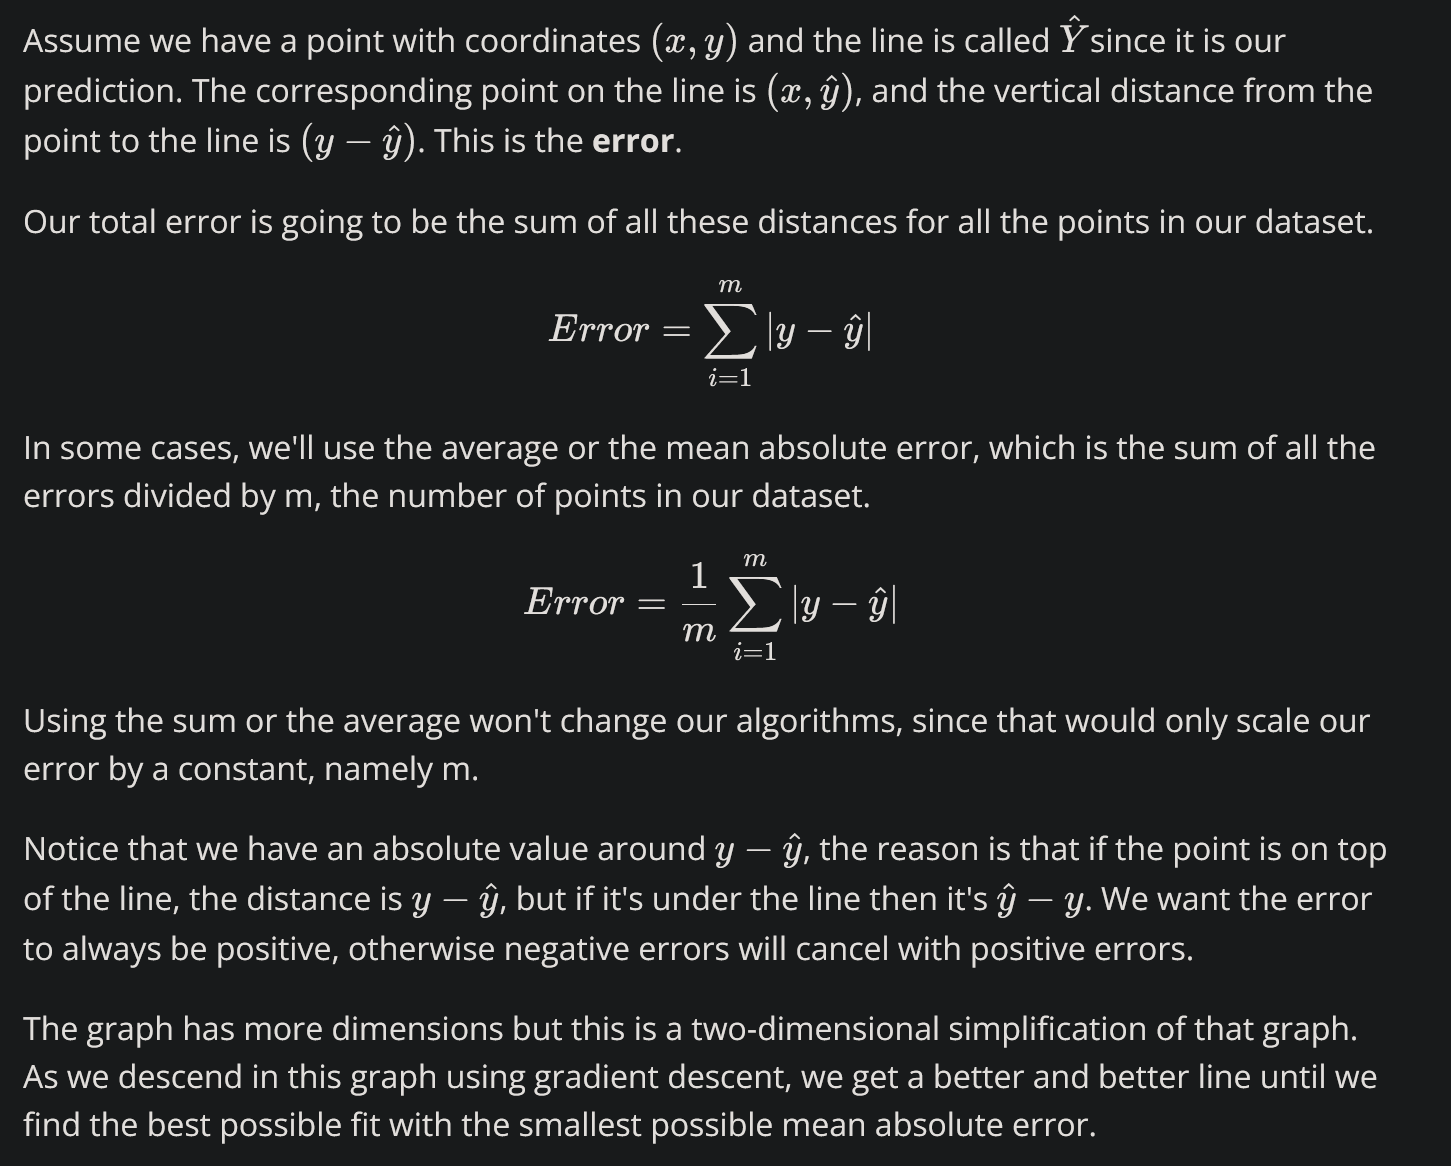

#### Mean Squared Error

Similar to Mean Absolute Error

Instead of taking the distance, we draw a square

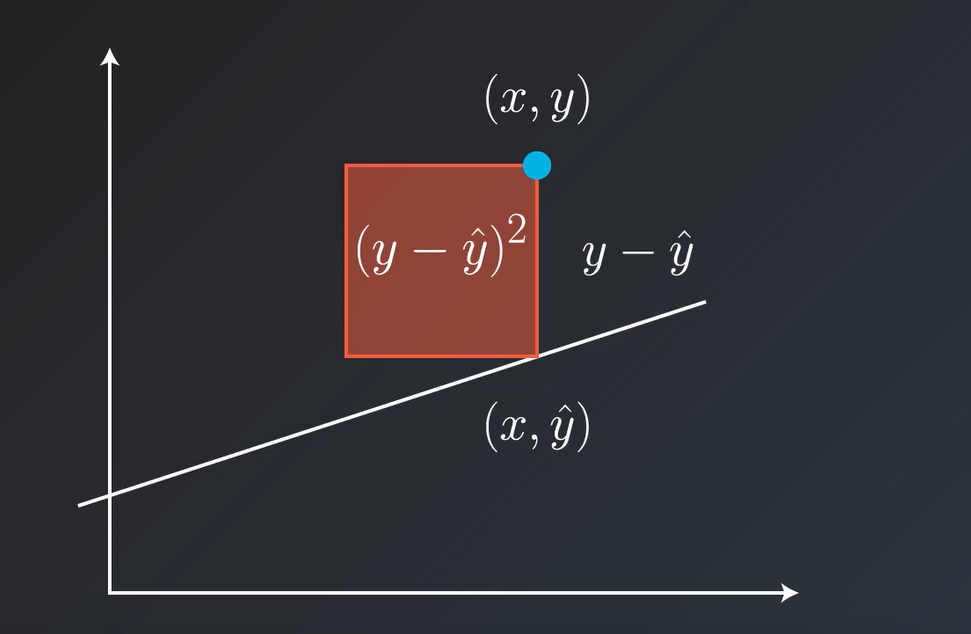

The area of that square is always $(y-\hat{y})^2$

Because the number is being squared, it is always positive, since it's either a + times a + or - times a -

Then we sum all the areas of the squares, then we find the mean. We factor in $1/2$ for convenience as well, as we are taking the derivative of the error later (help)


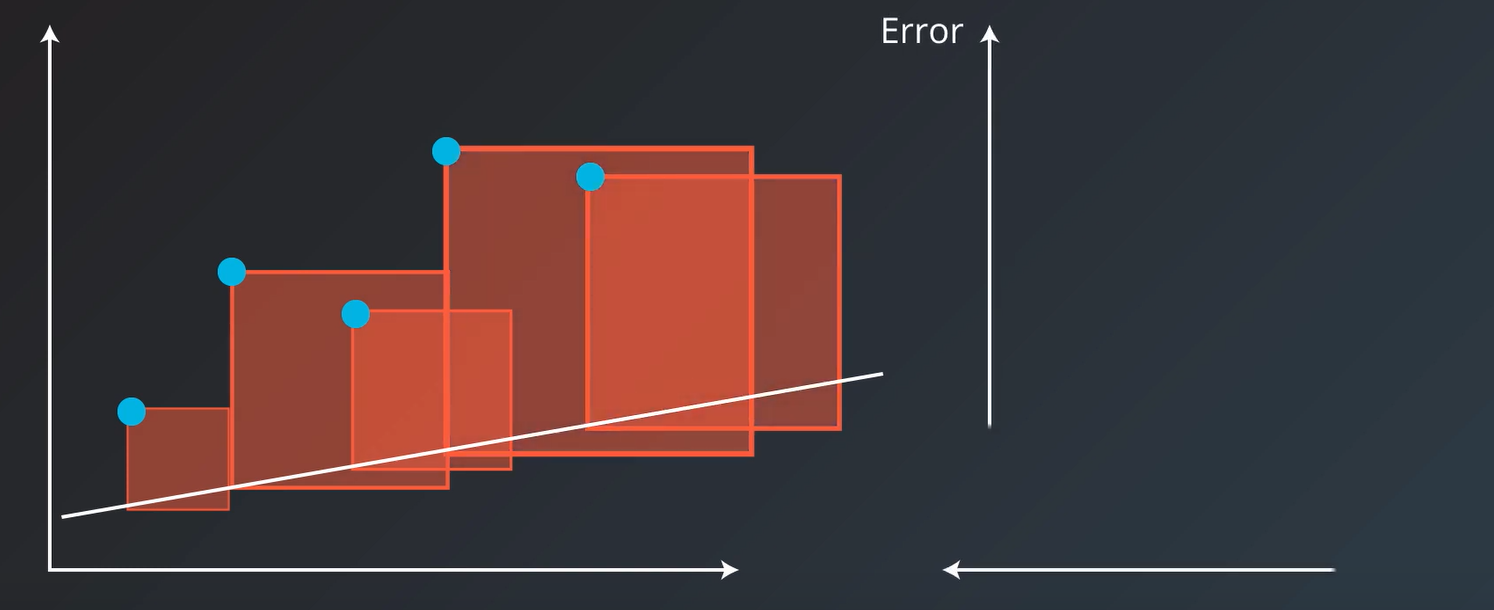

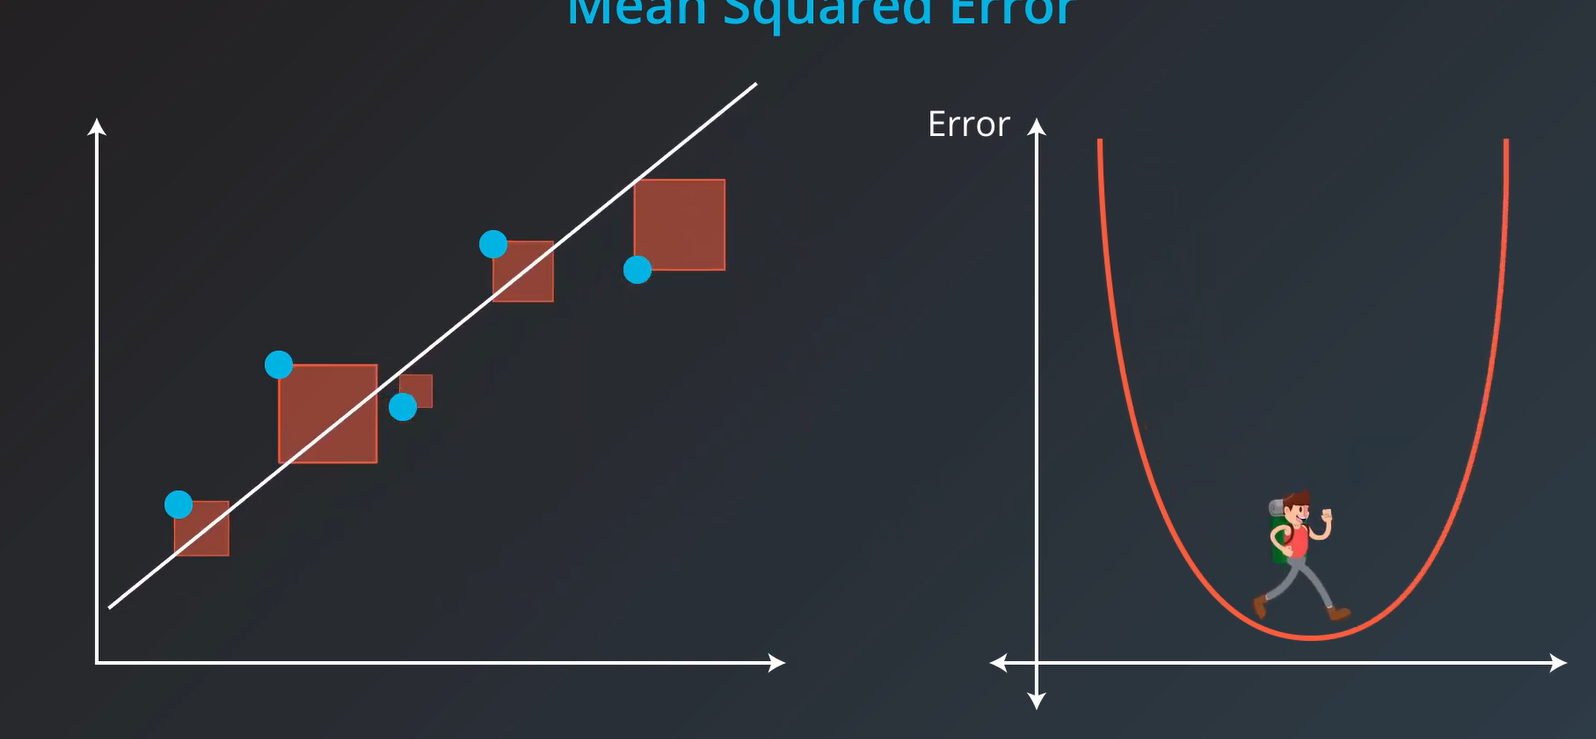

#### Minimizing Error Functions vs Tricks

This is effectively one of the tricks.

Square trick == mean squared error

Absolute trick == mean absolute error

Wow.

### Batch vs. Stochastic Gradient Descent

Two ways to go about fitting a line with/via/using/idkhelpme linear regression:
- Apply the squared/absolute trick at every point one by one, repeating this many times
- Doing that, but to all of the points at the same time

The former is known as **stochastic gradient descent** (one point at a time) and the latter is known as **batch gradient descent** (all points at a time)

Neither of these are the best or most used, as they are SLOW computationally, especially with a ton of data. Enter *mini-batch gradient descent*

#### Mini-batch Gradient Descent

The best way to do linear regression is this way
- Split your data into many small batches
- Each batch should be roughly the same # of points
- Use each batch to update your weights

Now for some code!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

In [ ]:
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # TODO: compute errors
    y_pred = None
    error = None
    
    # TODO: compute steps
    W_new = None
    b_new = None
    
    return W_new, b_new

In [ ]:
# The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.

def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


In [ ]:
# Import data from CSV file
data = np.loadtxt('./datasets/gd_data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]

In [ ]:
regression_coef = miniBatchGD(X, y)

# Plot the regression coefficient
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()